In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/itba-cifar-100-2024-q-1/y_train_fine.npy
/kaggle/input/itba-cifar-100-2024-q-1/y_train_coarse.npy
/kaggle/input/itba-cifar-100-2024-q-1/fine_label_names.pck
/kaggle/input/itba-cifar-100-2024-q-1/coarse_label_names.pck
/kaggle/input/itba-cifar-100-2024-q-1/x_test.npy
/kaggle/input/itba-cifar-100-2024-q-1/x_train.npy


In [56]:
x_train = np.load("/kaggle/input/itba-cifar-100-2024-q-1/x_train.npy")
x_test = np.load("/kaggle/input/itba-cifar-100-2024-q-1/x_test.npy")
y_train_coarse = np.load("/kaggle/input/itba-cifar-100-2024-q-1/y_train_coarse.npy")
y_train_fine = np.load("/kaggle/input/itba-cifar-100-2024-q-1/y_train_fine.npy")

In [57]:
import pickle
with open("/kaggle/input/itba-cifar-100-2024-q-1/fine_label_names.pck", "rb") as f:
    labels_fine = pickle.load(f)
with open("/kaggle/input/itba-cifar-100-2024-q-1/coarse_label_names.pck", "rb") as f:
    labels_coarse = pickle.load(f)

# EDA

### A ojo

In [5]:
x_train.shape # 50k imágenes, de 32x32 pixeles, RGB (3 canales)

(50000, 32, 32, 3)

In [6]:
x_test.shape # 10k imágenes, de 32x32 pixeles, RGB (3 canales)

(10000, 32, 32, 3)

In [7]:
labels_fine # 100 clases específicas

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [8]:
labels_coarse # 10 clases generales

['aquatic_mammals',
 'fish',
 'flowers',
 'food_containers',
 'fruit_and_vegetables',
 'household_electrical_devices',
 'household_furniture',
 'insects',
 'large_carnivores',
 'large_man-made_outdoor_things',
 'large_natural_outdoor_scenes',
 'large_omnivores_and_herbivores',
 'medium_mammals',
 'non-insect_invertebrates',
 'people',
 'reptiles',
 'small_mammals',
 'trees',
 'vehicles_1',
 'vehicles_2']

In [9]:
# Composición de cada superclase
for i, coarse in enumerate(labels_coarse):
    print(f"Coarse label: {coarse}")
    for fine in np.unique(y_train_fine[y_train_coarse == i]):
        print(f"\tFine label: {labels_fine[fine]}")

Coarse label: aquatic_mammals
	Fine label: beaver
	Fine label: dolphin
	Fine label: otter
	Fine label: seal
	Fine label: whale
Coarse label: fish
	Fine label: aquarium_fish
	Fine label: flatfish
	Fine label: ray
	Fine label: shark
	Fine label: trout
Coarse label: flowers
	Fine label: orchid
	Fine label: poppy
	Fine label: rose
	Fine label: sunflower
	Fine label: tulip
Coarse label: food_containers
	Fine label: bottle
	Fine label: bowl
	Fine label: can
	Fine label: cup
	Fine label: plate
Coarse label: fruit_and_vegetables
	Fine label: apple
	Fine label: mushroom
	Fine label: orange
	Fine label: pear
	Fine label: sweet_pepper
Coarse label: household_electrical_devices
	Fine label: clock
	Fine label: keyboard
	Fine label: lamp
	Fine label: telephone
	Fine label: television
Coarse label: household_furniture
	Fine label: bed
	Fine label: chair
	Fine label: couch
	Fine label: table
	Fine label: wardrobe
Coarse label: insects
	Fine label: bee
	Fine label: beetle
	Fine label: butterfly
	Fine l

In [10]:
y_train_coarse.shape # Clasicaciones coarse para las 50k imágenes

(50000,)

In [11]:
y_train_fine.shape # Clasificaciones fine para las 50k imágenes

(50000,)

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
%matplotlib inline

coarse N°: 19
fine N°: 89

coarse label: vehicles_2
fine label: tractor



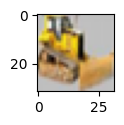

In [13]:
image_to_test = 56;

plt.figure(figsize=(1,1))
plt.imshow(x_train[image_to_test])

print("coarse N°: " + str(y_train_coarse[image_to_test]))
print("fine N°: " + str(y_train_fine[image_to_test]))
print("")
print("coarse label: " + labels_coarse[y_train_coarse[image_to_test]])
print("fine label: " + labels_fine[y_train_fine[image_to_test]])
print("")

### Statistics & *fancy plots*

In [14]:
fine_class_counts = Counter(y_train_fine)
fine_classes, fine_counts = zip(*sorted(fine_class_counts.items()))

coarse_class_counts = Counter(y_train_coarse)
coarse_classes, coarse_counts = zip(*sorted(coarse_class_counts.items()))

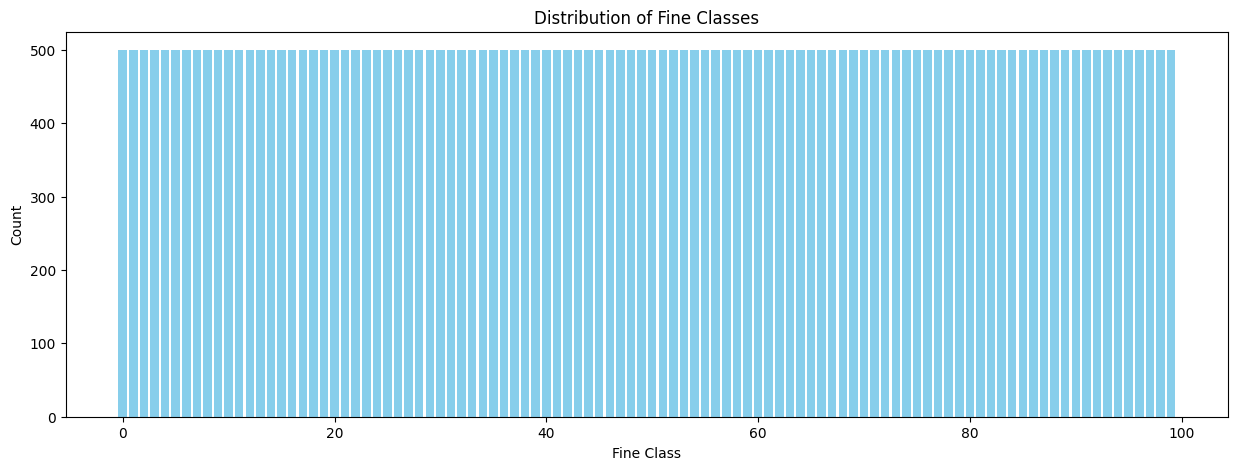

In [15]:
plt.figure(figsize=(15, 5))
plt.bar(fine_classes, fine_counts, color='skyblue')
plt.xlabel('Fine Class')
plt.ylabel('Count')
plt.title('Distribution of Fine Classes')
plt.show()

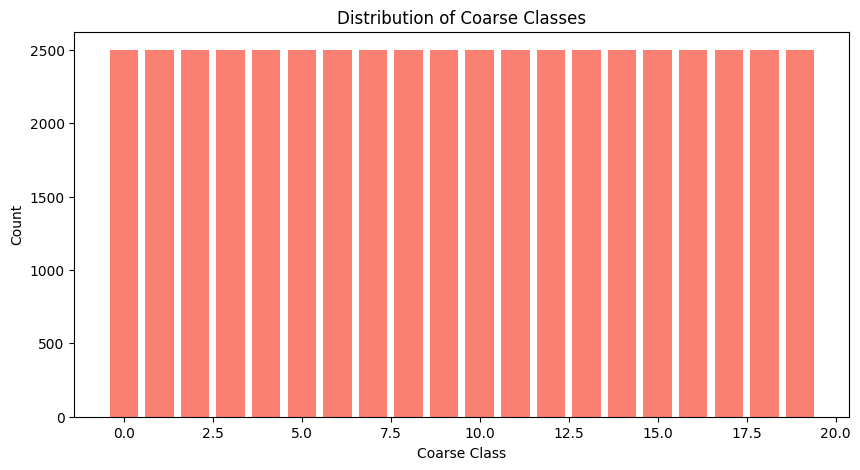

In [16]:
plt.figure(figsize=(10, 5))
plt.bar(coarse_classes, coarse_counts, color='salmon')
plt.xlabel('Coarse Class')
plt.ylabel('Count')
plt.title('Distribution of Coarse Classes')
plt.show()

In [17]:
print("Statistics of Fine Classes Distribution:")
print(f"Total classes: {len(fine_class_counts)}")
print(f"Average samples per class: {np.mean(list(fine_class_counts.values())):.2f}")
print(f"Standard deviation of samples per class: {np.std(list(fine_class_counts.values())):.2f}\n")

print("Statistics of Coarse Classes Distribution:")
print(f"Total classes: {len(coarse_class_counts)}")
print(f"Average samples per class: {np.mean(list(coarse_class_counts.values())):.2f}")
print(f"Standard deviation of samples per class: {np.std(list(coarse_class_counts.values())):.2f}")

Statistics of Fine Classes Distribution:
Total classes: 100
Average samples per class: 500.00
Standard deviation of samples per class: 0.00

Statistics of Coarse Classes Distribution:
Total classes: 20
Average samples per class: 2500.00
Standard deviation of samples per class: 0.00


#### t-SNE visualization

[TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE)

In [18]:
x_train_flat = x_train[:2000].reshape(x_train[:2000].shape[0], -1)
tsne = TSNE(n_components=3, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_flat)

In [19]:
print(x_train_flat.shape) # 2k imagenes con 3072 features
print(x_train_tsne.shape) # 2k imágenes con 3 features

(2000, 3072)
(2000, 3)


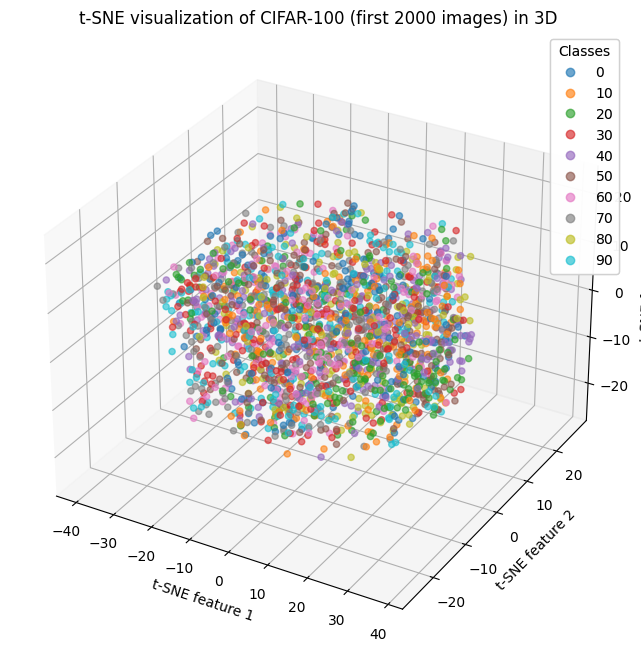

In [20]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], x_train_tsne[:, 2], c=y_train_fine[:2000], cmap='tab10', alpha=0.6)
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_title("t-SNE visualization of CIFAR-100 (first 2000 images) in 3D")
ax.set_xlabel("t-SNE feature 1")
ax.set_ylabel("t-SNE feature 2")
ax.set_zlabel("t-SNE feature 3")
plt.show()

In [21]:
fig = px.scatter_3d(
    x_train_tsne, x=0, y=1, z=2,
    color=y_train_fine[:2000],
    title="t-SNE visualization of CIFAR-100 (first 2000 images) in 3D",
    labels={'0': 't-SNE feature 1', '1': 't-SNE feature 2', '2': 't-SNE feature 3', 'color': 'Fine Class'}
)
fig.show()

## processing

sin data augmentation; lo incorporé para CNN recién

In [29]:
from keras.utils import to_categorical

2024-06-20 12:29:41.959788: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 12:29:41.959917: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 12:29:42.130341: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [78]:
# normalization
x_train_proc = x_train.reshape(50000, 32 * 32 * 3)
x_test_proc = x_test.reshape(10000, 32 * 32 * 3)

x_train_proc = x_train_proc.astype("float32")
x_test_proc = x_test_proc.astype("float32")

x_train_proc /= 255.0
x_test_proc /= 255.0

In [76]:
y_train_fine_proc = to_categorical(y_train_fine, 100)

In [79]:
print(x_train_proc.shape)
print(x_test_proc.shape)
print(y_train_fine_proc.shape)

(50000, 3072)
(10000, 3072)
(50000, 100)


In [80]:
# random shuffle

indices_train = np.arange(len(x_train_proc))
np.random.shuffle(indices_train)

x_train_proc = x_train_proc[indices_train]
y_train_fine_proc = y_train_fine_proc[indices_train]

## MLP Model

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Activation, Input
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import collections

In [38]:
num_epochs = 50
batch_size = 128

In [ ]:
>>> x = keras.Input(shape=(10, 64))
>>> y = keras.layers.Flatten()(x)
>>> y.shape
(None, 640)

In [85]:
model = Sequential()
model.add(Input(shape=(3072,)))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 100)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,722,852 (14.20 MB)

 Trainable params: 3,722,852 (14.20 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
rlrop = ReduceLROnPlateau(
    monitor = "val_accuracy",
    factor = 0.5,
    patience = 3,
    verbose = 1,
    min_lr = 1e-5
)

In [42]:
mc = ModelCheckpoint(
    ".weights.h5",
    monitor = "val_accuracy",
    verbose = 1,
    save_best_only = True,
    save_weights_only = True,
)

In [43]:
es = EarlyStopping(
    monitor = "val_accuracy",
    patience = 10, 
    verbose = 1,
    restore_best_weights = True,
)

In [86]:
history = model.fit(x=x_train_proc, y=y_train_fine_proc, batch_size=batch_size, epochs=num_epochs, validation_split=0.2, callbacks=[rlrop, es, mc])

Epoch 1/50
 65/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0119 - loss: 4.6370  

I0000 00:00:1718887349.350372     227 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718887349.364503     227 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0300 - loss: 4.5458

W0000 00:00:1718887350.737211     228 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718887351.525633     225 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.06150, saving model to .weights.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0300 - loss: 4.5455 - val_accuracy: 0.0615 - val_loss: 4.3023 - learning_rate: 0.0100
Epoch 2/50
 22/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0730 - loss: 4.2726 

W0000 00:00:1718887352.040789     228 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


305/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0766 - loss: 4.2291
Epoch 2: val_accuracy improved from 0.06150 to 0.09090, saving model to .weights.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0767 - loss: 4.2276 - val_accuracy: 0.0909 - val_loss: 4.0641 - learning_rate: 0.0100
Epoch 3/50
305/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0988 - loss: 4.0312
Epoch 3: val_accuracy improved from 0.09090 to 0.09820, saving model to .weights.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0990 - loss: 4.0302 - val_accuracy: 0.0982 - val_loss: 3.9636 - learning_rate: 0.0100
Epoch 4/50
305/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1169 - loss: 3.9112
Epoch 4: val_accuracy improved from 0.09820 to 0.12720, saving model to .weights.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1170 - loss: 3.9108 - val_accuracy: 0.1272 - val_loss: 3.8738 - learning_rate: 0.0100
Epoch 5/50
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1298 - loss:

In [87]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


In [91]:
print('Train loss:', history.history['loss'][-1])
print('Train acc:', history.history['accuracy'][-1])

print('Val loss:', history.history['val_loss'][-1])
print('Val acc:', history.history['val_accuracy'][-1])

Train loss: 2.870164155960083
Train acc: 0.3100999891757965
Val loss: 3.2455174922943115
Val acc: 0.23749999701976776


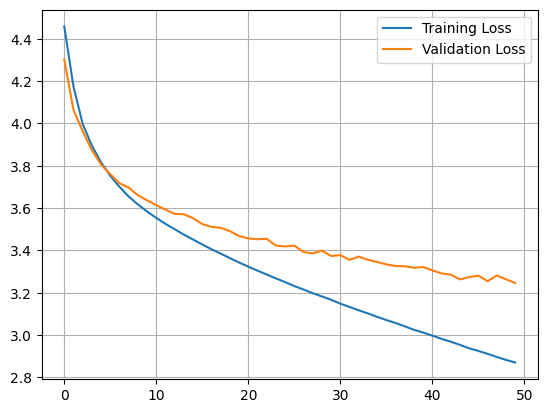

In [89]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.grid()
plt.legend()

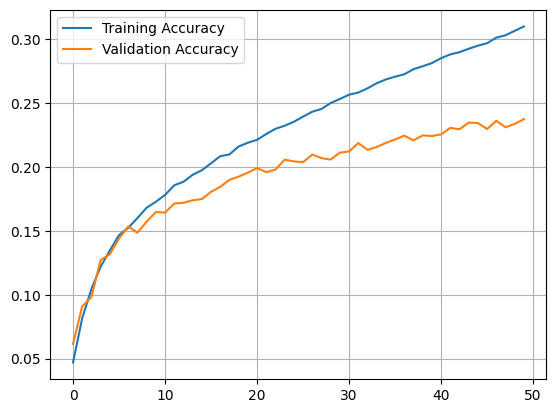

In [92]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.grid()
plt.legend()

In [93]:
predictions = model.predict(x_test_proc).argmax(axis=1)

 99/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1718887460.453739     227 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


W0000 00:00:1718887461.075295     228 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [94]:
print(predictions.shape)
print(predictions[1])

(10000,)
74


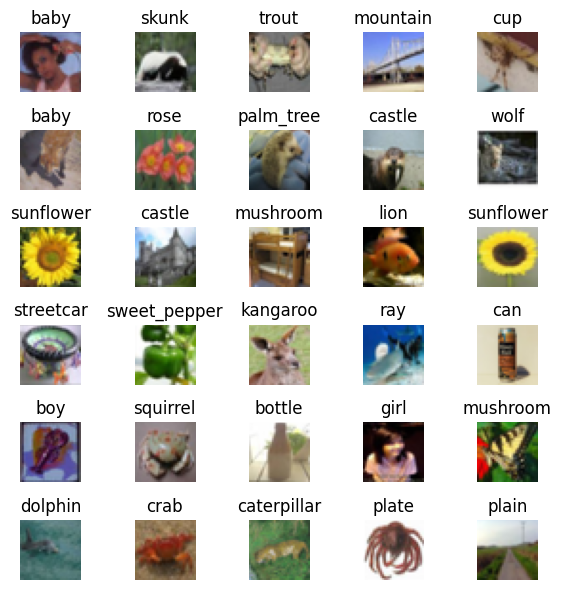

In [95]:
plt.figure(figsize=(6, 6))
for i in range (30):
    rand_num = np.random.randint(0, 10000)
    cifar_img = plt.subplot(6,5, i+1)
    plt.imshow(x_test[rand_num])
    plt.title(labels_fine[predictions[rand_num]])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [96]:
df = pd.DataFrame(predictions, columns=["Label"])
df.index.name = "Id"
df.head()
df.to_csv("submission.csv")